In [13]:
import numpy as np
import pandas as pd
import os
import re
import math
import matplotlib.pyplot as plt

In [2]:
with open("data.txt","r") as f:
    data = f.read()

In [3]:
data_list = re.split(r"^[A-CE-Z].+\n",data,flags=re.M)[1:]
print(data_list[63])

           1
     4.642805    0.042570   -0.001118
    -0.015052    4.595255    0.000136
    -0.030634   -0.050047   37.153234
   N 
  48
Direct configuration=    64
   0.49362609  0.62635626  0.76273768
   0.50582375  0.87235551  0.76285525
   0.01154681  0.86834766  0.78305671
   0.98822607  0.63481439  0.78310504
   0.93722821  0.39181133  0.71668633
   0.06361209  0.10768725  0.71658660
   0.71931716  0.35578525  0.69649997
   0.27701449  0.14437156  0.69629592
   0.39941956  0.91543262  0.68305843
   0.59872920  0.58404876  0.68344059
   0.30625965  0.63974835  0.68214669
   0.69222975  0.85983307  0.68224677
   0.76119724  0.09941779  0.61591069
   0.24336100  0.39684924  0.61549108
   0.25192787  0.15241642  0.62628869
   0.75768135  0.35108211  0.62757049
   0.58430826  0.58554584  0.58117082
   0.41569176  0.91445416  0.58117082
   0.08607106  0.91371799  0.56536492
   0.91392893  0.58628201  0.56536492
   0.91564006  0.41447517  0.53495094
   0.08435994  0.08552483  0.5349509

In [4]:
# 获得某一步晶胞常数,numpy.array形式返回
def get_onestep_constant(onestep_data):
    head_info = re.split(r"Direct configuration= +\d+",onestep_data)[0]
    xyz_coord = np.array(re.findall(r"-?\d+\.[\d]{1,}",head_info)).reshape(3,3).astype(np.float64) #一共九个坐标
    return xyz_coord
get_onestep_constant(data_list[63])

array([[ 4.6428050e+00,  4.2570000e-02, -1.1180000e-03],
       [-1.5052000e-02,  4.5952550e+00,  1.3600000e-04],
       [-3.0634000e-02, -5.0047000e-02,  3.7153234e+01]])

In [5]:
# 给定一个原子的分数坐标和该胞的晶格常数，得到笛卡尔坐标
def get_cartesol_coord(fraction_coord,cell_constant):
    cartesol_coord=[]
    for index in range(3):
        ss = fraction_coord[0]*cell_constant[0][index]+fraction_coord[1]*cell_constant[1][index]+fraction_coord[2]*cell_constant[2][index]
        cartesol_coord.append(ss)
    return cartesol_coord

In [6]:
# 获得某一步的原子的所有坐标
def get_onestep_atoms_coord(onestep_data):
    atoms_coord_str = re.split(r"Direct configuration= +\d+\n",onestep_data)[1]
    atoms_coord = re.split(r"\n",atoms_coord_str)[:-1]
        # 去除每一行原子坐标左右的空格,并且将以字符串打印出来的具体坐标切分成以x,y,z轴分割的列表列表
    for atom_index in range(len(atoms_coord)):
        atoms_coord.insert(atom_index, re.split(r"\s+",atoms_coord.pop(atom_index).strip()))
        # 将str转为int格式
    atoms_coord = np.array(atoms_coord).astype(np.float64)
        # 转为笛卡尔坐标
    atoms_coord_cartesol=[]
    cell_constant = get_onestep_constant(onestep_data)
    for atom_coord in atoms_coord:
        atoms_coord_cartesol.append(get_cartesol_coord(atom_coord,cell_constant))
    return atoms_coord_cartesol
get_onestep_atoms_coord(data_list[0])

[[2.08505065031863, 2.28793455635967, 31.17615992197665],
 [1.6539090781638899, 3.44574494364033, 31.17615992197665],
 [0.2893272319829, 3.5143930268843397, 30.906574370589333],
 [3.4496320019147095, 2.21928643489113, 30.906574370589333],
 [3.4834789949038103, 1.5754464417491099, 29.603673829025944],
 [0.30153531469408995, 0.33578005825089, 29.603673829025944],
 [2.22370795669633, 1.5708439025408698, 28.917742578884877],
 [1.5613065428431199, 0.34038263568366, 28.917742578884877],
 [1.53563150793201, 3.4970107658876097, 27.68738631805104],
 [2.2033282205505103, 2.23666873411239, 27.68738631805104],
 [0.28444443751605997, 3.4921938252905997, 27.02951371395114],
 [3.45451487254239, 2.2414856364848696, 27.02951371395114],
 [3.4677751705601803, 1.5844281742367998, 25.77945344932482],
 [0.31723921519855997, 0.3267983257632, 25.77945344932482],
 [1.57265192878092, 0.32953466696778, 25.13134203579237],
 [2.21236257075853, 1.58169187125675, 25.13134203579237],
 [2.19810308136572, 2.23822145274

In [7]:
# 获得某一步的指定原子的坐标,designated参数为指定的编号的原子
def get_onestep_atoms_coord_designated(onestep_data,*designated):
    atoms_coord = get_onestep_atoms_coord(onestep_data)
    stoms_coord_designated = []
        #如果传入的参数是列表的话，则使用列表
    if isinstance(designated[0],list):designated=designated[0]
    for index in designated:
        stoms_coord_designated.append(atoms_coord[index-1])
    return stoms_coord_designated

In [8]:
get_cartesol_coord([0.5,0.5,0.5],get_onestep_constant(data_list[0]))

[1.8809935, 1.9112265, 20.5455495]

In [9]:
# 获得x轴步数和y轴距离
def get_step_dist(designated_atoms, steps_to_start_plot):
    with open("data.txt","r") as f:
        data = f.read()
    data_list = re.split(r"^[A-CE-Z].+\n",data,flags=re.M)[1:]

    # step为一步的XDATCAR信息
    y_axis_distance = []
    for step in range(len(data_list)):
        atoms_coord = get_onestep_atoms_coord_designated(data_list[step],*designated_atoms)
#         center_coord = get_cartesol_coord([0.5,0.5,0.5],get_onestep_constant(data_list[step]))
        # 中心原子的坐标为中间一层(第20-28个原子的平均坐标)
        center_coord_np = np.array(get_onestep_atoms_coord_designated(data_list[step],[i for i in range(20,29)]))
        center_coord_pd = pd.DataFrame(center_coord_np)
        center_coord = [center_coord_pd[0].mean(),center_coord_pd[1].mean(),center_coord_pd[2].mean()]
        # 指定原子距离中心点的距离的列表
        distance=[]
        for atom_coord in atoms_coord:
            distance.append(math.sqrt(math.pow(atom_coord[0]-center_coord[0],2)+\
                                    math.pow(atom_coord[1]-center_coord[1],2)+\
                                    math.pow(atom_coord[2]-center_coord[2],2)))
        distance_mean = np.array(distance).mean() # 平均距离
        y_axis_distance.append(distance_mean)
    y_axis_distance = y_axis_distance[steps_to_start_plot-1:]
    dataframe = pd.DataFrame({"step":range(steps_to_start_plot,len(y_axis_distance)+steps_to_start_plot),"dist":y_axis_distance})
    return dataframe

In [10]:
def main():
    designated_atoms = np.array(input("请输入原子序号，相邻两个数字用空格切分").split(" ")).astype(np.int8)
    steps_to_start_plot = int(input("请输入从第几步开始绘图"))
    return get_step_dist(designated_atoms, steps_to_start_plot)

In [11]:
data_upper = main()
data_lower = main()

请输入原子序号，相邻两个数字用空格切分1 2
请输入从第几步开始绘图2
请输入原子序号，相邻两个数字用空格切分47 48
请输入从第几步开始绘图2


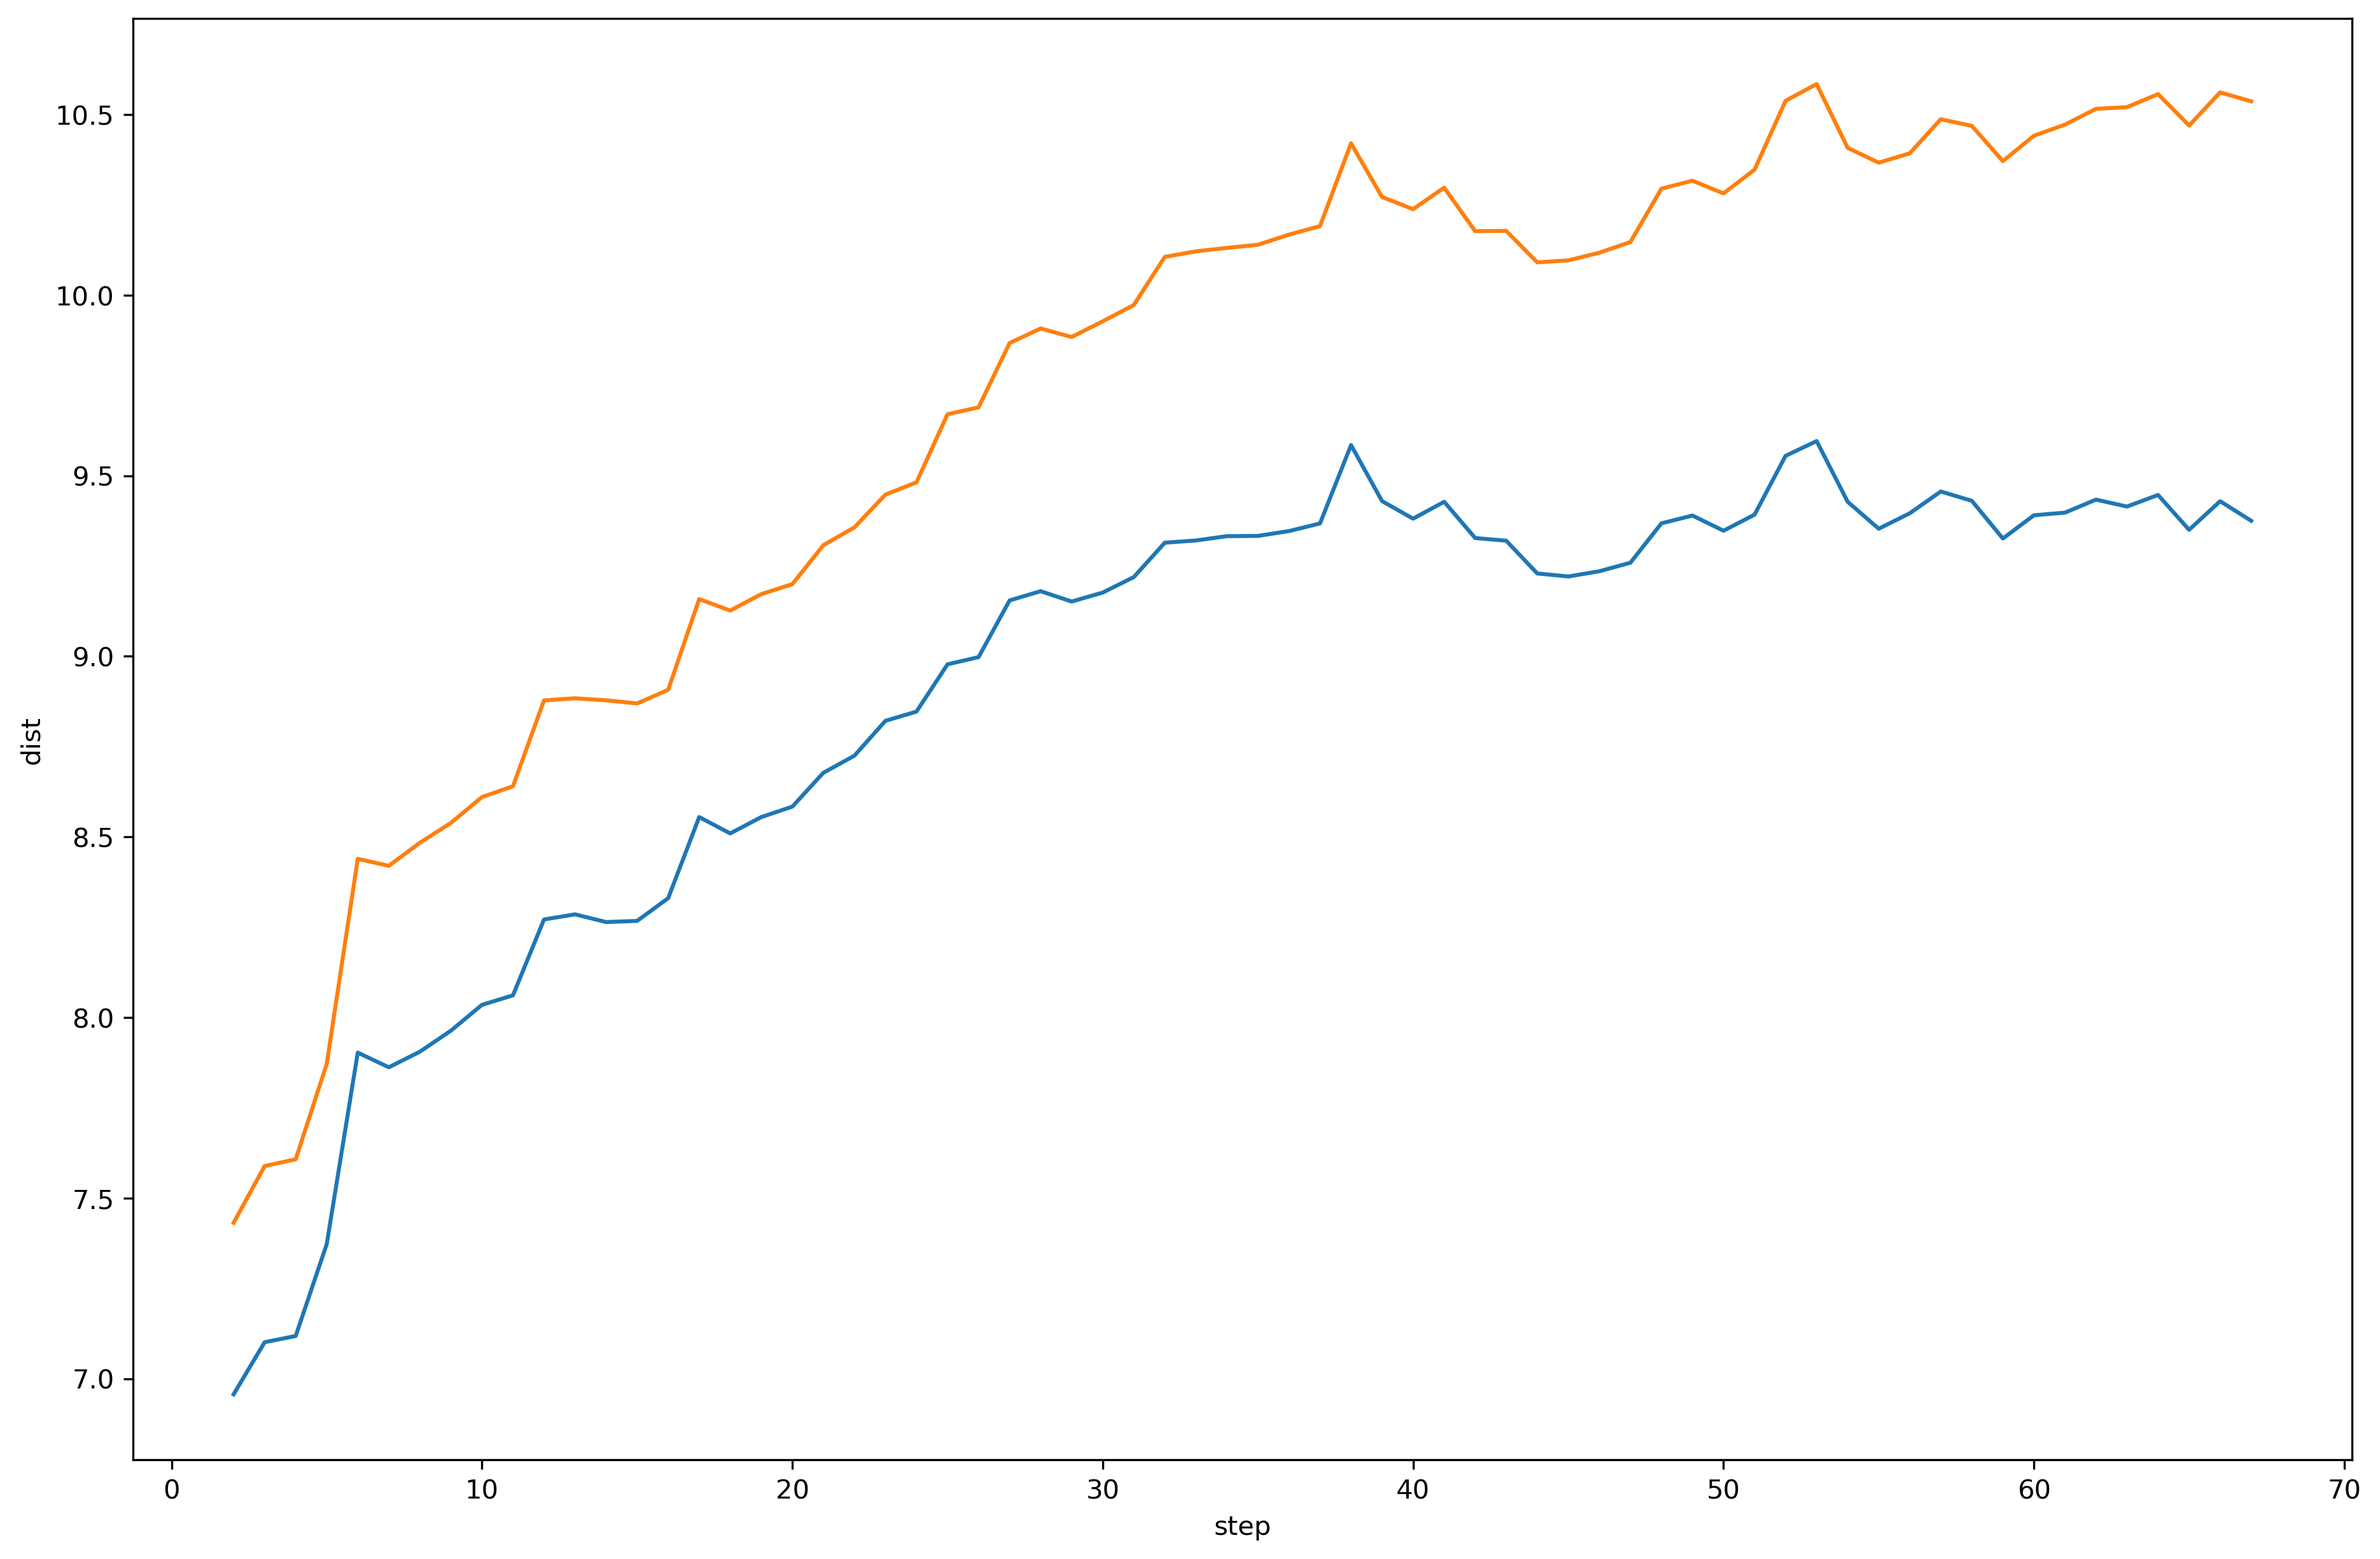

In [22]:
# 用图像表示
import seaborn as sns
fig,axes = plt.subplots(1,1,figsize=(15,10),dpi=300)
sns.lineplot(x="step",y="dist",data=data_upper,ax=axes)
sns.lineplot(x="step",y="dist",data=data_lower,ax=axes)
fig.savefig("fig.png",dpi=400)